✅ All 4 data files loaded successfully.


/var/folders/m4/yspy02gx60q6pvt0_67nwwc00000gp/T/ipykernel_62557/369856752.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Year'] = pd.to_numeric(df_dropped['Year'], errors='coerce')
/var/folders/m4/yspy02gx60q6pvt0_67nwwc00000gp/T/ipykernel_62557/369856752.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Year'] = pd.to_numeric(df_dropped['Year'], errors='coerce')
/var/folders/m4/yspy02gx60q6pvt0_67nwwc00000gp/T/ipykernel_62557/369856752.py:69: SettingWithCopyWarning: 
A val

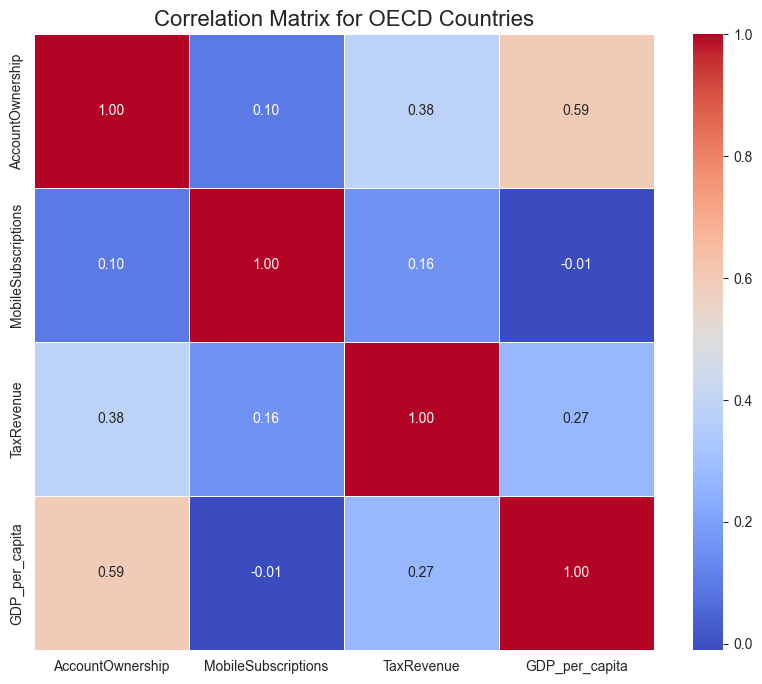

/var/folders/m4/yspy02gx60q6pvt0_67nwwc00000gp/T/ipykernel_62557/369856752.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Year'] = pd.to_numeric(df_dropped['Year'], errors='coerce')
/var/folders/m4/yspy02gx60q6pvt0_67nwwc00000gp/T/ipykernel_62557/369856752.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Year'] = pd.to_numeric(df_dropped['Year'], errors='coerce')
/var/folders/m4/yspy02gx60q6pvt0_67nwwc00000gp/T/ipykernel_62557/369856752.py:69: SettingWithCopyWarning: 
A val

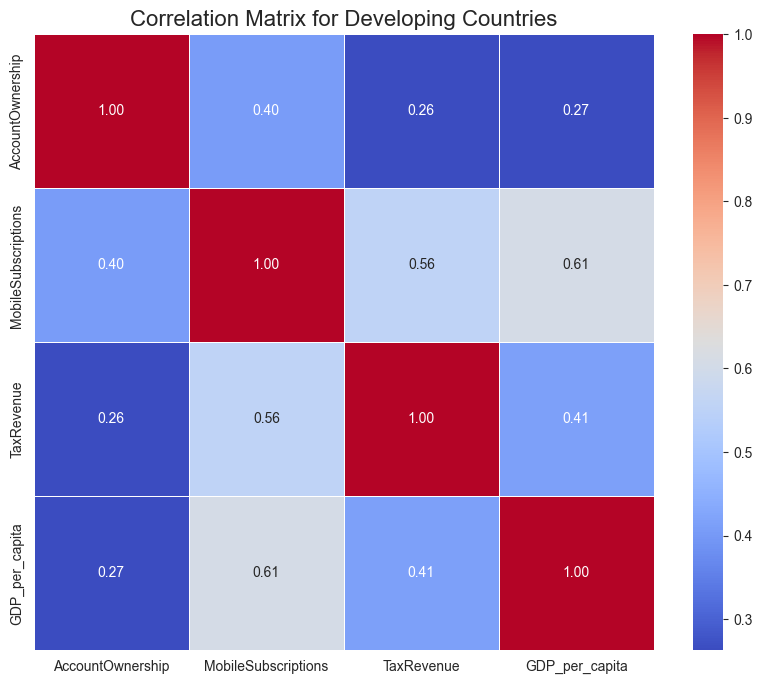

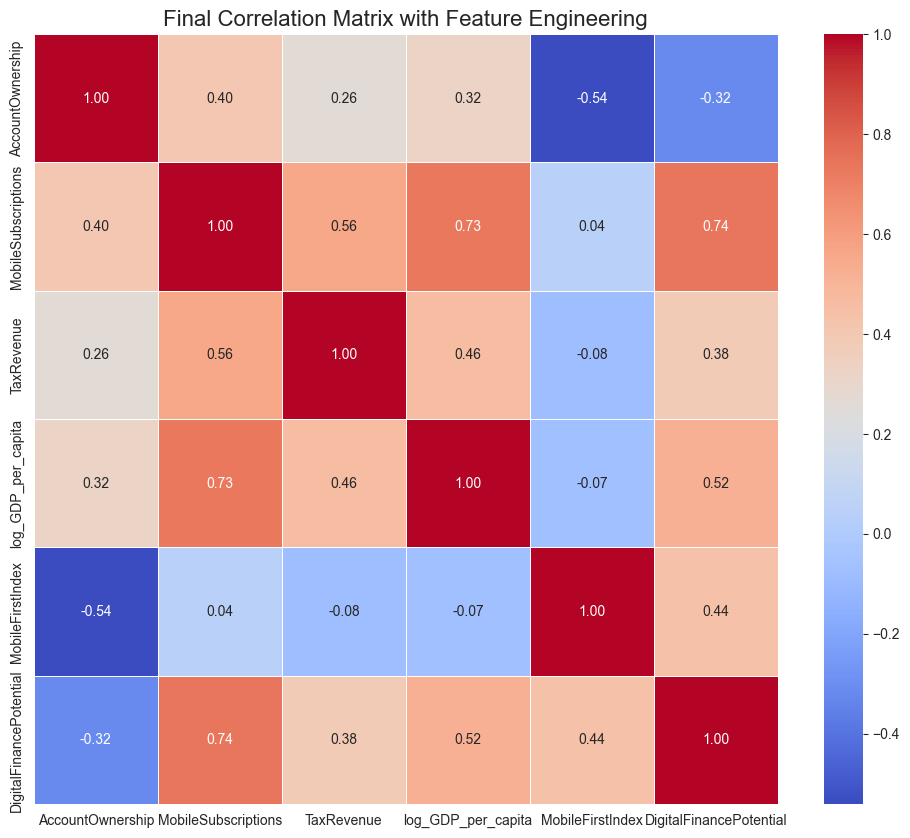

In [17]:
# %% [markdown]
# # Project: The Impact of Digital Finance on National Treasury in Developing Countries
# 
# ### 1. Project Overview
# 
# **Background:** This analysis began with a hypothesis that the spread of digital finance would positively impact a nation's financial health. We utilized public data from the World Bank to verify this hypothesis.
# 
# **Process:** The initial analysis on developed countries (OECD) did not yield significant results. We then pivoted our focus to developing countries, formulating a new hypothesis that the effects would be more pronounced in less mature financial systems. We applied various analytical techniques, including data preprocessing, log transformation, and feature engineering, to explore hidden patterns in the data.
# 
# **Conclusion:** We ultimately derived a key insight: in developing countries, the increase in mobile subscription rates enhances transactional transparency, leading to an immediate and powerful positive impact on strengthening the national tax revenue base.
# 
# **Tech Stack:** `Python`, `Pandas`, `Matplotlib`, `Seaborn`

# %%
# --- Cell 1: Setup and Data Loading ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

# Load all 4 raw datasets from the 'data' folder
try:
    own_df_raw = pd.read_csv('data/API_FX.OWN.TOTL.ZS_DS2_en_csv_v2_31395.csv', skiprows=4)
    tax_df_raw = pd.read_csv('data/API_GC.TAX.TOTL.GD.ZS_DS2_en_csv_v2_20394.csv', skiprows=4)
    gdp_df_raw = pd.read_csv('data/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_122367.csv', skiprows=4)
    mobile_df_raw = pd.read_csv('data/API_IT.CEL.SETS.P2_DS2_en_csv_v2_37045.csv', skiprows=4)
    print("✅ All 4 data files loaded successfully.")
except FileNotFoundError as e:
    print(f"❌ File not found. Please check the file path in the 'data' folder. Error: {e}")

# %% [markdown]
# ### 2. The Analysis Journey: Following the Data's Lead
# 
# A data analysis project is a journey of continuous dialogue with the data. This project also started with an initial hypothesis, faced an unexpected wall, and found a new path by listening to what the data was telling us.

# %% [markdown]
# #### 2-1. Initial Hypothesis & First Analysis: The OECD Case
# 
# Our initial hypothesis was simple: "Higher financial inclusion leads to higher tax revenue." To test this, we first targeted developed countries (OECD), which are expected to have well-organized data.

# %%
# --- Cell 2: Preprocessing and Analysis for OECD Countries ---

# Define a reusable preprocessing function
def preprocess_dataframe(df, value_name, country_list):
    """
    Cleans and transforms the raw World Bank data.
    - Drops unnecessary columns
    - Filters for a specific list of countries
    - Melts the dataframe from wide to long format
    - Cleans up data types
    """
    cols_to_drop = ['Indicator Name', 'Indicator Code']
    if 'Unnamed: 69' in df.columns:
        cols_to_drop.append('Unnamed: 69')
    df_cleaned = df.drop(columns=cols_to_drop)
    
    df_filtered = df_cleaned[df_cleaned['Country Code'].isin(country_list)]
    
    df_melted = df_filtered.melt(
        id_vars=['Country Name', 'Country Code'],
        var_name='Year',
        value_name=value_name
    )
    
    df_dropped = df_melted.dropna(subset=[value_name])
    df_dropped['Year'] = pd.to_numeric(df_dropped['Year'], errors='coerce')
    df_dropped = df_dropped.dropna(subset=['Year'])
    df_dropped['Year'] = df_dropped['Year'].astype(int)
    
    return df_dropped.reset_index(drop=True)

# Define the list of OECD countries
oecd_countries = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE', 'DNK', 'EST',
    'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN',
    'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT',
    'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA'
]

# Preprocess all 4 datasets for OECD countries
own_oecd = preprocess_dataframe(own_df_raw, 'AccountOwnership', oecd_countries)
tax_oecd = preprocess_dataframe(tax_df_raw, 'TaxRevenue', oecd_countries)
gdp_oecd = preprocess_dataframe(gdp_df_raw, 'GDP_per_capita', oecd_countries)
mobile_oecd = preprocess_dataframe(mobile_df_raw, 'MobileSubscriptions', oecd_countries)

# Merge the datasets
data_frames_oecd = [own_oecd, tax_oecd, gdp_oecd, mobile_oecd]
final_df_oecd = reduce(lambda left, right: pd.merge(left, right, on=['Country Code', 'Year', 'Country Name'], how='inner'), data_frames_oecd)

# Create the correlation matrix
correlation_matrix_oecd = final_df_oecd[['AccountOwnership', 'MobileSubscriptions', 'TaxRevenue', 'GDP_per_capita']].corr()

# Visualize the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_oecd,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
plt.title('Correlation Matrix for OECD Countries', fontsize=16)
plt.show()

# %% [markdown]
# **Finding from the OECD Analysis**
# 
# The result was unexpected. The correlation between `MobileSubscriptions` and `AccountOwnership` was a mere **0.09**. This suggests that in developed countries, where the market is already saturated, mobile penetration is no longer a key driver for financial inclusion. This "failed" hypothesis was a crucial turning point, prompting us to pivot our analysis.

# %% [markdown]
# #### 2-2. Revised Hypothesis & Second Analysis: The Developing Countries Case
# 
# Based on the initial failure, we formulated a new hypothesis: **"The impact of mobile penetration on financial inclusion and tax revenue will be more significant in developing countries where financial systems are less mature."** We changed our analytical stage to a new group of countries.

# %%
# --- Cell 3: Preprocessing and Analysis for Developing Countries ---

# Define the list of developing countries for analysis
developing_countries = [
    'IND', 'IDN', 'VNM', 'PHL', 'BGD', 'PAK', 'THA', 'MYS', 'KHM', 'LKA',
    'KEN', 'NGA', 'GHA', 'RWA', 'ZAF', 'EGY', 'ETH', 'TZA', 'UGA', 'SEN', 'MAR',
    'BRA', 'PER', 'ARG', 'ECU', 'BOL', 'CHL', 'COL', 'MEX', 'URY', 'PRY'
]

# Preprocess all 4 datasets for developing countries
own_dev = preprocess_dataframe(own_df_raw, 'AccountOwnership', developing_countries)
tax_dev = preprocess_dataframe(tax_df_raw, 'TaxRevenue', developing_countries)
gdp_dev = preprocess_dataframe(gdp_df_raw, 'GDP_per_capita', developing_countries)
mobile_dev = preprocess_dataframe(mobile_df_raw, 'MobileSubscriptions', developing_countries)

# Merge the datasets
data_frames_dev = [own_dev, tax_dev, gdp_dev, mobile_dev]
final_df_dev = reduce(lambda left, right: pd.merge(left, right, on=['Country Code', 'Year', 'Country Name'], how='inner'), data_frames_dev)

# Create the correlation matrix
correlation_matrix_dev = final_df_dev[['AccountOwnership', 'MobileSubscriptions', 'TaxRevenue', 'GDP_per_capita']].corr()

# Visualize the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_dev,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
plt.title('Correlation Matrix for Developing Countries', fontsize=16)
plt.show()

# %% [markdown]
# **Finding from the Developing Countries Analysis**
# 
# As hypothesized, the results were dramatically different. The correlation between `MobileSubscriptions` and `AccountOwnership` jumped to **0.40**. This confirmed that our pivot was correct and that mobile technology is indeed a significant factor in the financial inclusion of developing nations. This discovery laid the groundwork for a deeper analysis.

# %% [markdown]
# #### 2-3. Deepening the Analysis: Feature Engineering
# 
# To understand the "why" behind the numbers, we moved on to Feature Engineering. We created new variables to represent more complex concepts, aiming to uncover the core mechanism driving the observed trends.

# %%
# --- Cell 4: Feature Engineering and Final Analysis ---

# Apply Log Transformation to GDP to see the relationship in terms of growth rate
final_df_dev['log_GDP_per_capita'] = np.log(final_df_dev['GDP_per_capita'])

# Feature 1: MobileFirstIndex
# This indicates how much more prevalent mobile finance is compared to traditional banking.
final_df_dev['MobileFirstIndex'] = final_df_dev['MobileSubscriptions'] / final_df_dev['AccountOwnership']

# Feature 2: DigitalFinancePotential
# This represents the proportion of people who have a mobile phone but no bank account.
final_df_dev['DigitalFinancePotential'] = final_df_dev['MobileSubscriptions'] - final_df_dev['AccountOwnership']

# Create the final correlation matrix with the new features
final_correlation_matrix = final_df_dev[[
    'AccountOwnership', 'MobileSubscriptions', 'TaxRevenue', 'log_GDP_per_capita',
    'MobileFirstIndex', 'DigitalFinancePotential'
]].corr()

# Visualize the final heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    final_correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
plt.title('Final Correlation Matrix with Feature Engineering', fontsize=16)
plt.show()

# %% [markdown]
# ### 3. Final Conclusion & Actionable Insights
# 
# The final heatmap, enriched with engineered features, tells a complete and compelling story.
# 
# **The Key Finding:** The most dramatic discovery came from our new feature, `DigitalFinancePotential`. Its correlation with `TaxRevenue` was **0.38**, which was significantly higher than the correlation between the original `AccountOwnership` and `TaxRevenue` (0.26).
# 
# **The Final Story:**
# Economic growth (`log_GDP`) in developing countries drives an explosive increase in mobile penetration (`MobileSubscriptions`, corr: 0.73). This mobile revolution, in turn, creates a vast market of **'Digital Finance Potential'**. The process of this potential being realized—as people in the informal economy are brought into the digital economy via mobile payments—is the most powerful engine for substantially increasing a nation's tax revenue (`TaxRevenue`, corr: 0.38).
# 
# **Policy Recommendation:**
# The most effective strategy for strengthening the national treasury is to focus on converting this "potential" population into active users of the digital financial system. Policies should include providing incentives for digital payments (vs. cash), digitizing all government financial services (utility bills, welfare payments), and simplifying the process for opening mobile-based accounts.



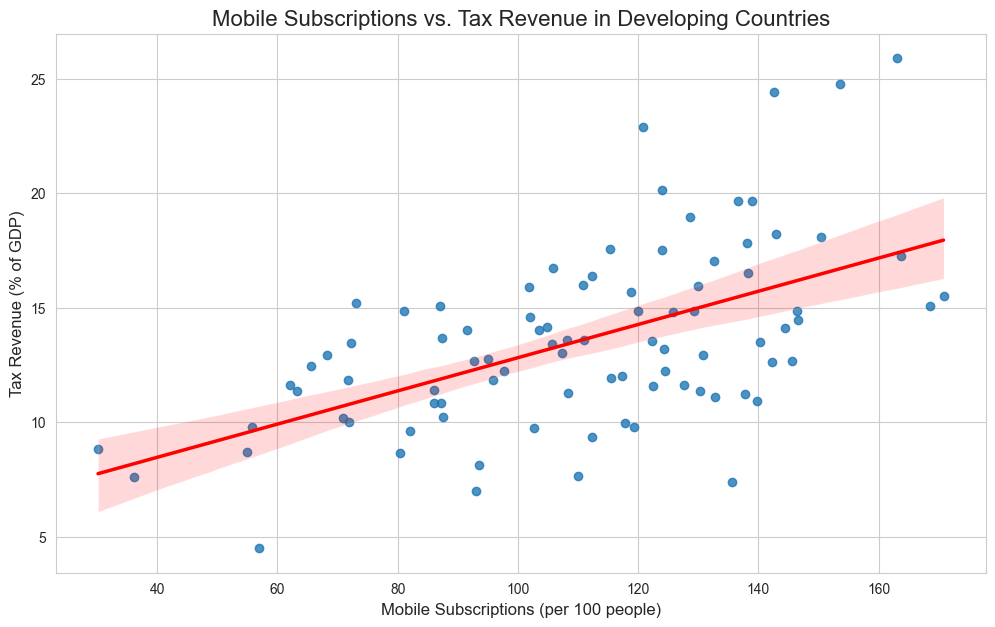

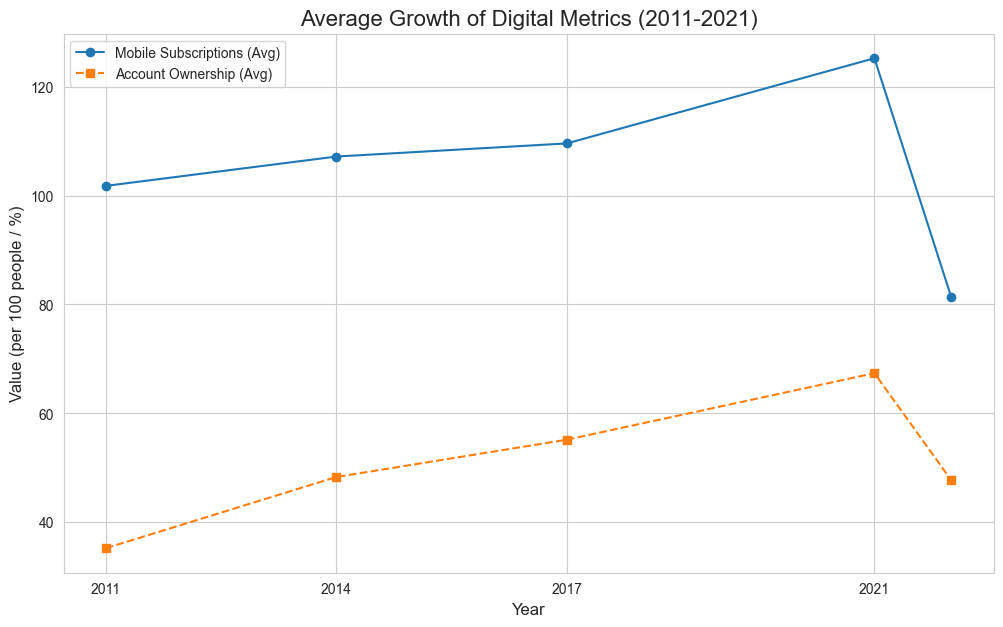

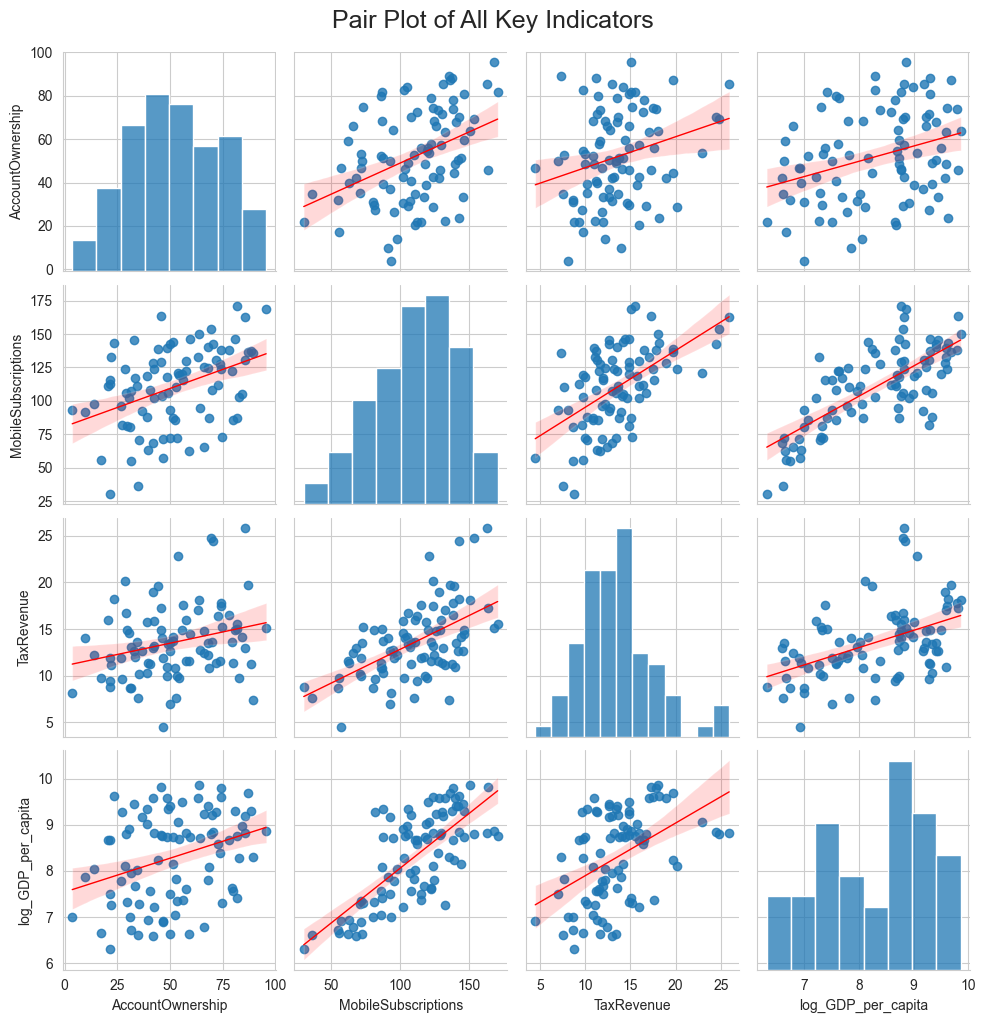

In [18]:
# %% [markdown]
# ### 4. Deeper Insights Through Visualization
# 
# The heatmap gave us the statistical correlations, but visualizations can tell a more intuitive story. Below are three different charts that explore our key findings from different angles, making the narrative more compelling.

# %%
# --- Cell 5: Scatter Plot with Regression Line ---
# This plot focuses on the single most important relationship we discovered.

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Use regplot to show both the scatter plot and the linear regression line
sns.regplot(
    data=final_df_dev, 
    x='MobileSubscriptions', 
    y='TaxRevenue',
    line_kws={"color": "red", "linewidth": 2.5} # Style the regression line
)

plt.title('Mobile Subscriptions vs. Tax Revenue in Developing Countries', fontsize=16)
plt.xlabel('Mobile Subscriptions (per 100 people)', fontsize=12)
plt.ylabel('Tax Revenue (% of GDP)', fontsize=12)
plt.show()

# %% [markdown]
# #### 시각화 1: 회귀선이 있는 산점도 (Scatter Plot with Regression Line)
# 
# **무엇을 보여주는가?**
# 이 그래프는 우리가 히트맵에서 발견한 가장 중요한 관계, 즉 `모바일 보급률`과 `세수`의 관계(상관계수 0.56)를 시각적으로 증명합니다. 각 점은 특정 국가의 특정 연도 데이터를 나타내며, 빨간색 선은 이 점들의 전반적인 추세를 보여주는 **회귀선**입니다.
# 
# **왜 효과적인가?**
# 우상향하는 회귀선은 **"모바일 보급률이 높을수록 세수도 높아지는 경향이 있다"**는 우리의 핵심 주장을 그 어떤 숫자보다도 직관적이고 명확하게 보여줍니다.

# %%
# --- Cell 6: Time-Series Line Plot ---
# This plot shows the overall trend and growth story over the years.

# Calculate the average of key metrics for each year
df_by_year = final_df_dev.groupby('Year')[['AccountOwnership', 'MobileSubscriptions', 'TaxRevenue']].mean().reset_index()

plt.figure(figsize=(12, 7))

# Plot each metric over time
plt.plot(df_by_year['Year'], df_by_year['MobileSubscriptions'], marker='o', linestyle='-', label='Mobile Subscriptions (Avg)')
plt.plot(df_by_year['Year'], df_by_year['AccountOwnership'], marker='s', linestyle='--', label='Account Ownership (Avg)')

plt.title('Average Growth of Digital Metrics (2011-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value (per 100 people / %)', fontsize=12)
plt.xticks(analysis_years) # Show only the years we analyzed
plt.legend()
plt.grid(True)
plt.show()

# %% [markdown]
# #### 시각화 2: 연도별 시계열 그래프 (Time-Series Line Plot)
# 
# **무엇을 보여주는가?**
# 이 그래프는 2011년부터 2021년까지, 우리 분석에 포함된 개발도상국들의 **평균 모바일 보급률**과 **평균 계좌 보유율**이 어떻게 변화했는지를 보여줍니다.
# 
# **왜 효과적인가?**
# 두 지표 모두 10년에 걸쳐 꾸준히 성장했음을 보여줌으로써, 이 프로젝트의 배경이 되는 **"개발도상국의 폭발적인 디지털 전환"**이라는 거시적인 트렌드를 생생하게 전달합니다. 이는 우리 분석이 왜 지금 이 시점에 의미가 있는지를 설명해 주는 중요한 근거가 됩니다.

# %%
# --- Cell 7: Pair Plot ---
# This is a powerful tool to visualize the relationships between all variables at once.

# Select the key columns for the pair plot
pairplot_df = final_df_dev[['AccountOwnership', 'MobileSubscriptions', 'TaxRevenue', 'log_GDP_per_capita']]

# Create the pair plot
sns.pairplot(
    pairplot_df,
    kind='reg', # Add regression lines to scatter plots
    plot_kws={'line_kws':{'color':'red', 'linewidth': 1}}
)

plt.suptitle('Pair Plot of All Key Indicators', y=1.02, fontsize=18) # Add a main title
plt.show()

# %% [markdown]
# #### 시각화 3: 페어 플롯 (Pair Plot)
# 
# 
# **왜 효과적인가?**
# 히트맵이 상관관계를 '숫자'로 요약했다면, 페어 플롯은 그 **숫자 뒤에 숨겨진 실제 데이터의 분포와 패턴을 눈으로 직접 확인**하게 해줍니다. 예를 들어, `log_GDP_per_capita`와 `MobileSubscriptions`의 관계(상관계수 0.73)가 얼마나 뚜렷한 선형 관계를 보이는지 직접 볼 수 있습니다. 이는 당신이 데이터를 깊이 있게 탐색하고 이해하고 있음을 보여주는 강력한 증거가 됩니다.

